In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [43]:
df_seeds = pd.read_csv('/content/seeds_dataset.txt', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3493439039.py:1: SyntaxWarning: invalid escape sequence '\s'
  df_seeds = pd.read_csv('/content/seeds_dataset.txt', sep='\s+', header=None)


In [44]:
scaler = StandardScaler()
scaled_seeds = scaler.fit_transform(df_seeds.iloc[:, :-1])

In [45]:
cov_matrix = np.cov(scaled_seeds, rowvar=False)

In [46]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [47]:
sorted_indices = np.argsort(eigenvalues)[::-1]
top_2_eigenvectors = eigenvectors[:, sorted_indices[:2]]
scaled_seeds_2d = np.dot(scaled_seeds, top_2_eigenvectors)

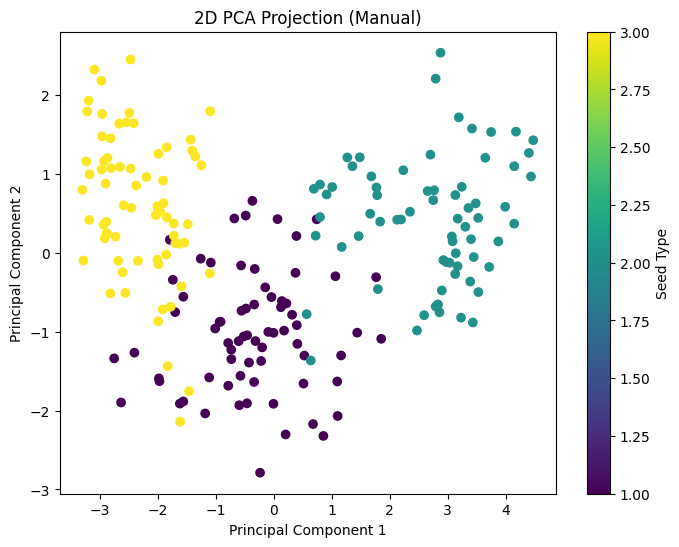

In [48]:
target = df_seeds.iloc[:, -1]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(scaled_seeds_2d[:, 0], scaled_seeds_2d[:, 1], c=target, cmap='viridis')
plt.title('2D PCA Projection (Manual)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Seed Type')
plt.show()

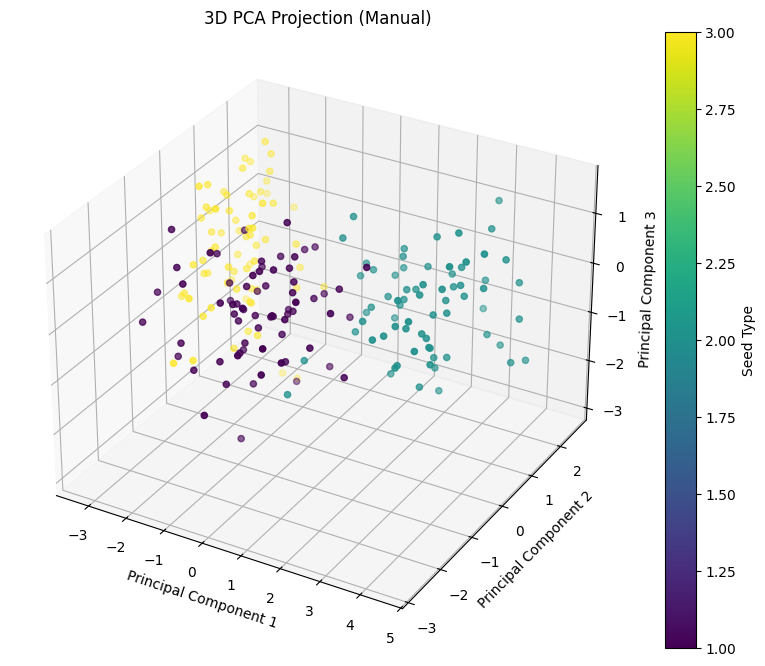

In [49]:
sorted_indices = np.argsort(eigenvalues)[::-1]
top_3_eigenvectors = eigenvectors[:, sorted_indices[:3]]
scaled_seeds_3d = np.dot(scaled_seeds, top_3_eigenvectors)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_seeds_3d[:, 0], scaled_seeds_3d[:, 1], scaled_seeds_3d[:, 2], c=target, cmap='viridis')
ax.set_title('3D PCA Projection (Manual)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, label='Seed Type')
plt.show()

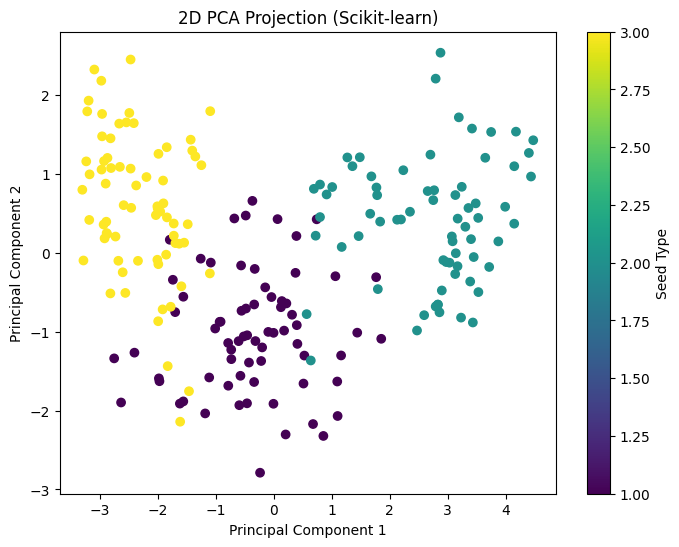

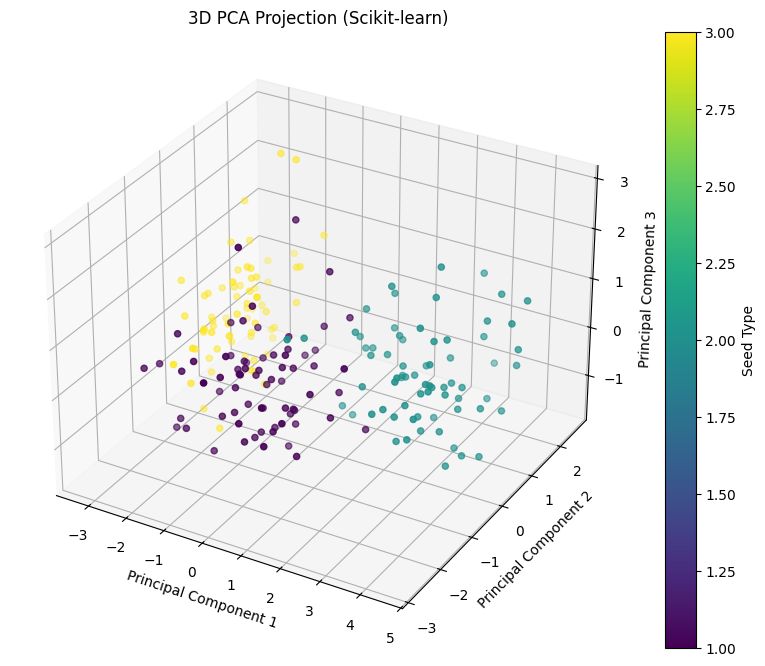

In [50]:
from sklearn.decomposition import PCA

pca_2d_sklearn = PCA(n_components=2)
scaled_seeds_2d_sklearn = pca_2d_sklearn.fit_transform(scaled_seeds)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(scaled_seeds_2d_sklearn[:, 0], scaled_seeds_2d_sklearn[:, 1], c=target, cmap='viridis')
plt.title('2D PCA Projection (Scikit-learn)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Seed Type')
plt.show()

pca_3d_sklearn = PCA(n_components=3)
scaled_seeds_3d_sklearn = pca_3d_sklearn.fit_transform(scaled_seeds)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(scaled_seeds_3d_sklearn[:, 0], scaled_seeds_3d_sklearn[:, 1], scaled_seeds_3d_sklearn[:, 2], c=target, cmap='viridis')
ax.set_title('3D PCA Projection (Scikit-learn)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, label='Seed Type')
plt.show()

In [51]:
total_var = np.sum(eigenvalues)

sorted_eigenvalues = np.sort(eigenvalues)[::-1]
explained_var_ratio = np.cumsum(sorted_eigenvalues) / total_var

loss_2d = 1 - explained_var_ratio[1]
loss_3d = 1 - explained_var_ratio[2]

print("Потери при 2D проекции:", loss_2d)
print("Потери при 3D проекции:", loss_3d)

Потери при 2D проекции: 0.11017513815087676
Потери при 3D проекции: 0.013317504067955621
